In [38]:
%matplotlib inline
%load_ext autoreload
%autoreload

import os, sys
parentdir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parentdir)

from quanty.model import backtester as q
from quanty.model import backtester_base as q_base
from quanty.model import db_manager as dm
from quanty.model import plotter as pltr
from quanty.model import setting
from quanty.model.portfolio import Port
from quanty.model.dual_momentum import DualMomentumSelector, DualMomentumPort

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
db = dm.read_db(base='global_20201231.pkl', add=[])
start = '2010-12-31'
end = '2020-12-31'

# Global sector model

In [40]:
gsam = q.Backtester(
    setting.base_params(db), 
    w_type='inv_ranky2', 
    rebal_style='cum', 
    n_picks=5, 
    assets=setting.assets_global_sector, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/121 [00:00<?, ?it/s]

3.1696691513061523


<Figure size 432x288 with 0 Axes>

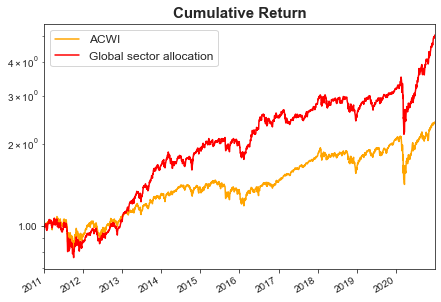

In [41]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'Global sector allocation']
color = ['orange', 'r']

gsam.plot_cum(strats, names=names, color=color, logy=True);

In [42]:
gsam.get_stats().tail()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Aerospace,1.83,2518,6.19,27.05,0.23,-60.63,13.74,15.37,0.92,1.04,15.60,65.55,0.79,87.70
Agribiz,1.74,2518,5.64,19.02,0.30,-36.75,4.72,15.02,0.32,0.99,28.12,60.50,0.94,59.42
Gaming,1.98,2518,7.01,24.00,0.29,-56.43,10.06,19.37,0.32,1.07,40.99,59.66,0.94,24.88
Automotive,2.08,2518,7.56,23.62,0.32,-51.20,3.64,18.28,0.19,1.04,42.18,55.46,1.15,42.73
DualMomentum,5.03,2518,17.40,20.61,0.84,-38.37,14.73,16.96,0.86,1.00,18.25,65.55,1.12,90.66


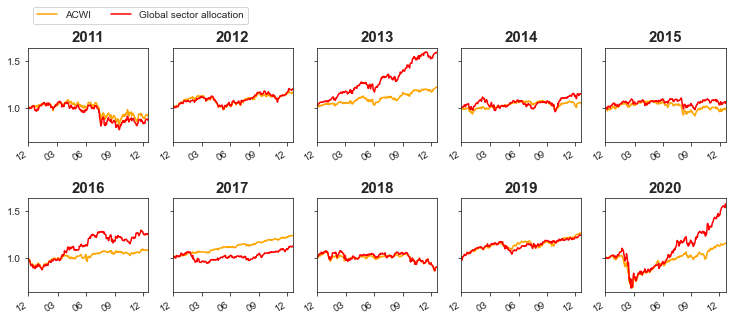

In [43]:
gsam.plot_cum_yearly(strats, names=names, color=color);#, remove=range(2003,2016));

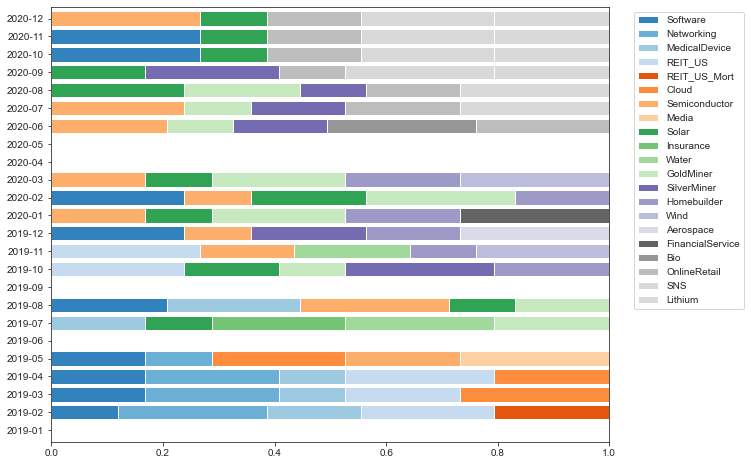

In [44]:
gsam.plot_weight([2019,2020]);

In [10]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar            0.119299
Semiconductor    0.266760
Lithium          0.206631
SNS              0.238597
OnlineRetail     0.168714
Name: 2020-11-27 00:00:00, dtype: float64

In [45]:
gsam.weight.iloc[-1][gsam.weight.iloc[-1]>0]

Solar           0.119299
Lithium         0.168714
OnlineRetail    0.206631
Wind            0.266760
SNS             0.238597
Name: 2020-12-30 00:00:00, dtype: float64

# US factor model

In [46]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_2, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='US', #'BND_US_Long', 
    cash_equiv='US', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/121 [00:00<?, ?it/s]

2.487438201904297


<Figure size 432x288 with 0 Axes>

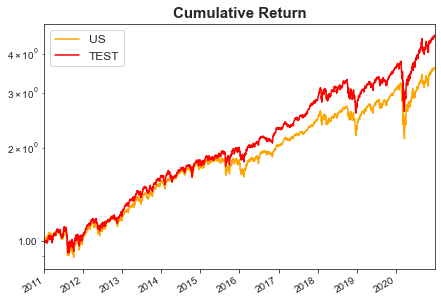

In [47]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [48]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
ACWI,2.41,2518,9.13,17.51,0.52,-33.53,10.18,13.72,0.65,1.00,22.65,65.55,0.92,90.86
Growth,4.53,2518,16.19,17.63,0.92,-31.35,16.48,13.78,1.11,0.95,4.41,67.23,1.22,97.66
US,3.61,2518,13.60,17.13,0.79,-33.72,14.92,12.86,1.09,0.95,6.79,71.43,0.90,97.03
Momentum,4.80,2518,16.87,18.23,0.93,-34.08,16.72,14.29,1.19,0.93,3.35,67.23,1.27,98.00
Value,2.70,2518,10.38,17.62,0.59,-37.04,10.78,13.26,0.90,0.96,16.97,67.23,0.91,92.40
Quality,3.77,2518,14.09,16.93,0.83,-34.06,13.99,12.58,1.04,0.92,4.45,68.07,1.11,97.38
DualMomentum,4.58,2518,16.32,17.75,0.92,-31.02,15.99,14.05,1.10,0.94,3.44,65.55,1.31,98.06


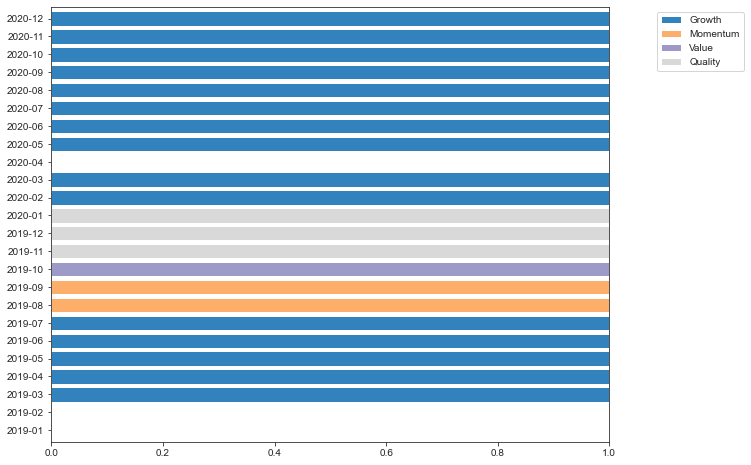

In [49]:
ufam.plot_weight([2019,2020]);

In [50]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Growth    1.0
Name: 2020-12-30 00:00:00, dtype: float64

### Quality 기본 + 낙폭과대

In [51]:
ufam = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    freq='M',
    assets=setting.assets_test_6, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,-1,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='US', 
    supporter='Quality', #'BND_US_Long', 
    cash_equiv='Quality', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/121 [00:00<?, ?it/s]

2.628354072570801


<Figure size 432x288 with 0 Axes>

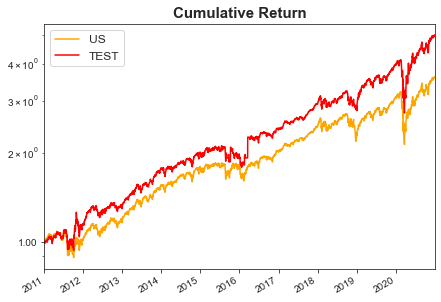

In [52]:
strats = ['US', 'DualMomentum']
names = ['US', 'TEST']
color = ['orange', 'r']

ufam.plot_cum(strats, names=names, color=color, logy=True);

In [53]:
ufam.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
DvdApprec,3.28,2518,12.53,15.94,0.79,-31.72,12.82,11.94,1.07,0.86,6.88,70.59,0.94,97.42
US,3.61,2518,13.60,17.13,0.79,-33.72,14.92,12.86,1.09,0.95,6.79,71.43,0.90,97.03
HighBeta,2.80,2518,10.77,26.95,0.40,-46.84,12.71,20.63,0.56,1.37,30.72,59.66,1.08,79.81
HighFCF,3.43,2518,13.01,19.41,0.67,-38.63,13.82,15.31,0.95,1.01,21.42,63.87,1.08,87.57
Momentum,4.80,2518,16.87,18.23,0.93,-34.08,16.72,14.29,1.19,0.93,3.35,67.23,1.27,98.00
LowBeta,2.98,2518,11.47,16.11,0.71,-37.13,11.50,11.05,1.07,0.79,9.43,71.43,0.86,91.33
ACWI,2.41,2518,9.13,17.51,0.52,-33.53,10.18,13.72,0.65,1.00,22.65,65.55,0.92,90.86
LowVol,3.05,2518,11.72,15.32,0.77,-36.26,12.99,10.84,1.19,0.75,10.22,65.55,1.25,96.52
Growth,4.53,2518,16.19,17.63,0.92,-31.35,16.48,13.78,1.11,0.95,4.41,67.23,1.22,97.66
Momentum_EM,0.95,2518,-0.48,25.75,-0.02,-59.02,-0.02,21.48,-0.00,0.76,50.37,58.82,0.75,-23.35


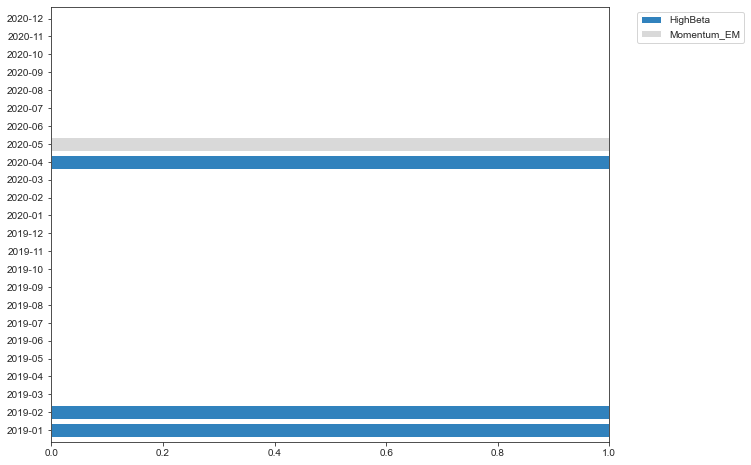

In [54]:
ufam.plot_weight([2019,2020]);

In [55]:
ufam.weight.iloc[-1][ufam.weight.iloc[-1]>0]

Quality    1.0
Name: 2020-12-30 00:00:00, dtype: float64

# US-DM-EM model

In [56]:
udem = q.Backtester(
    setting.base_params(db), 
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_test_0, 
    sig_w_base=[1,0,0,0,0,0,0,0,0,0,0,0], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    follow_trend_market=(20,60), 
    follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end 
)

  0%|          | 0/121 [00:00<?, ?it/s]

2.777575969696045


<Figure size 432x288 with 0 Axes>

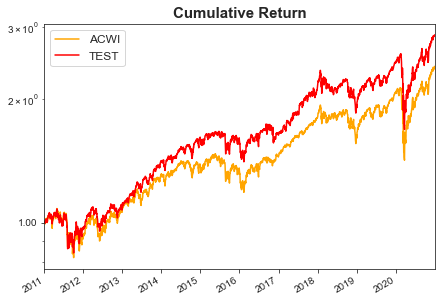

In [57]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

udem.plot_cum(strats, names=names, color=color, logy=True);

In [58]:
udem.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Global,1.66,2518,5.14,18.60,0.28,-34.98,4.62,14.18,0.27,1.03,37.20,58.82,0.97,66.04
ACWI,2.41,2518,9.13,17.51,0.52,-33.53,10.18,13.72,0.65,1.00,22.65,65.55,0.92,90.86
EM,1.34,2518,2.94,22.14,0.13,-38.20,1.96,19.11,0.10,1.13,44.47,50.42,1.21,-16.89
US_Total,3.62,2518,13.62,17.50,0.78,-35.00,14.68,13.21,1.07,0.97,9.30,71.43,0.88,96.42
DualMomentum,2.87,2518,11.04,18.16,0.61,-34.69,11.49,15.04,0.72,0.99,17.85,67.23,0.93,94.05


In [59]:
udem.weight.tail()

,Global,ACWI,EM,US_Total
2020-08-31,0.0,0.0,0.0,1.0
2020-09-30,0.0,0.0,0.0,1.0
2020-10-30,0.0,0.0,0.0,1.0
2020-11-30,0.0,0.0,0.0,1.0
2020-12-30,0.0,0.0,0.0,1.0


# Global country 낙폭과대

In [60]:
usm = q.Backtester(
    setting.base_params(db),
    w_type='ew', 
    rebal_style='cum', 
    n_picks=1, 
    assets=setting.assets_global_eq2, 
    sig_w_base=[-1,0,0,0,0,0,-1,0,0,0,0,1], 
    #sig_w_dynamic=True, 
    #sig_dyn_fwd=21*np.array([1]), 
    #sig_dyn_n_sample= 21*6, 
    #sig_dyn_m_backs=12, 
    #sig_dyn_thres=0.0, 
    #follow_trend=(20,60), 
    #follow_trend_market=(20,60), 
    #follow_trend_supporter=(60,250), 
    strong_condition=True, 
    market='ACWI', 
    supporter='ACWI', #'BND_US_Long', 
    cash_equiv='ACWI', #'BND_US_Tbill', 
    start=start, 
    end=end
)

  0%|          | 0/121 [00:00<?, ?it/s]

2.568815231323242


<Figure size 432x288 with 0 Axes>

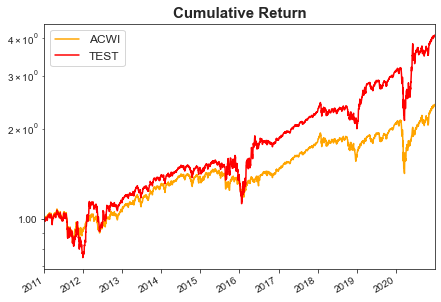

In [61]:
strats = ['ACWI', 'DualMomentum']
names = ['ACWI', 'TEST']
color = ['orange', 'r']

usm.plot_cum(strats, names=names, color=color, logy=True);

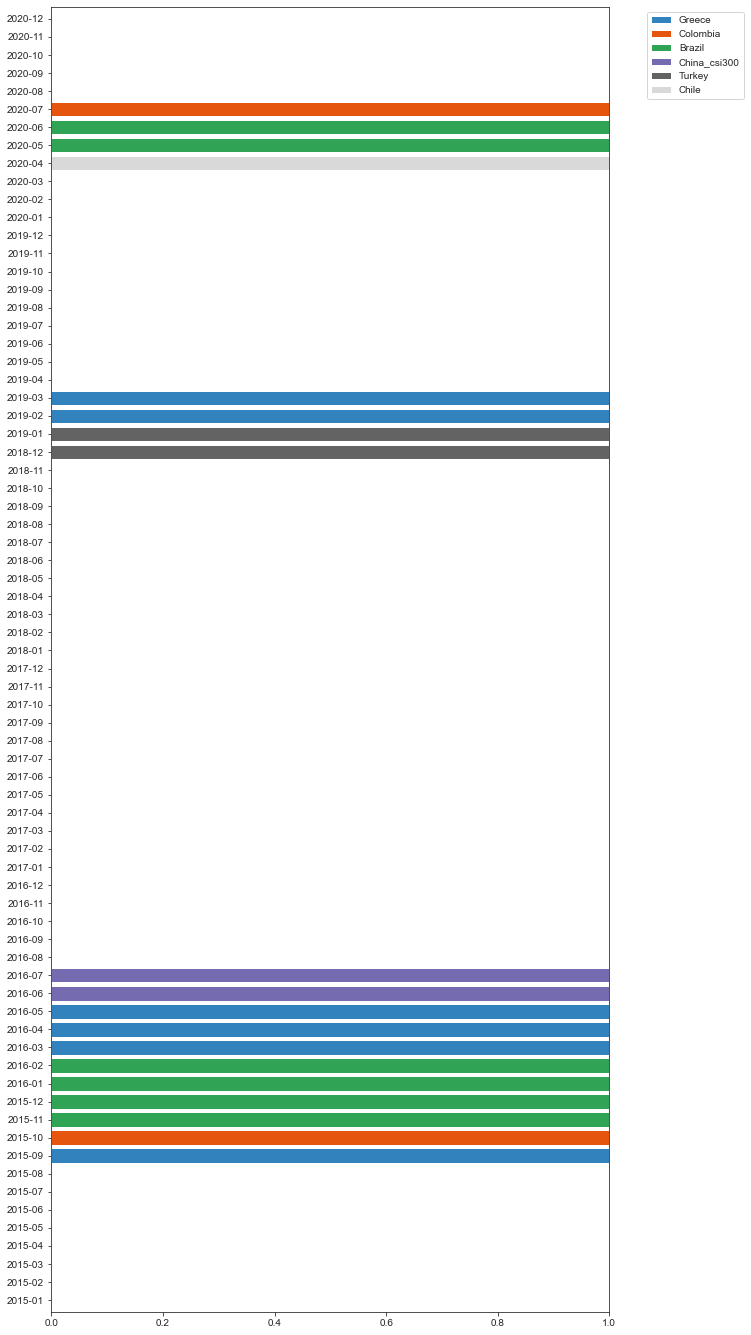

In [62]:
usm.plot_weight([2015,2020]);

In [63]:
usm.get_stats()

,cum_last,n_samples,cagr,std,sharpe,mdd,cagr_roll_med,std_roll_med,sharpe_roll_med,beta,loss_proba,hit,profit_to_loss,consistency
Turkey,0.51,2518,-6.49,33.10,-0.20,-72.34,-7.36,32.11,-0.23,1.06,61.88,49.58,0.99,68.45
Italy,1.22,2518,1.99,28.40,0.07,-51.11,-0.38,24.27,-0.01,1.34,50.55,55.46,0.95,-4.07
SouthAfrica,0.90,2518,-1.03,31.55,-0.03,-62.25,-1.19,28.78,-0.04,1.40,52.75,52.10,1.00,2.11
Austria,1.15,2518,1.41,24.38,0.06,-58.10,0.79,18.73,0.04,1.14,49.01,52.94,1.04,-16.81
Russia,0.90,2518,-1.03,32.37,-0.03,-67.18,-0.81,26.57,-0.03,1.33,52.27,50.42,1.08,-53.32
Ireland,2.98,2518,11.47,22.04,0.52,-46.48,8.64,16.89,0.43,0.95,32.35,58.82,1.19,71.38
Singapore,1.15,2518,1.36,18.66,0.07,-40.84,1.62,15.48,0.11,0.87,44.82,52.94,1.03,14.56
Greece,0.67,2518,-3.87,39.84,-0.10,-79.50,-2.60,39.30,-0.08,1.17,51.56,48.74,0.94,40.90
Africa,0.80,2518,-2.17,20.65,-0.11,-59.35,-0.96,17.47,-0.06,0.84,51.65,50.42,1.00,29.16
US_Nasdaq,6.36,2518,20.17,19.62,1.03,-28.56,20.06,16.49,1.23,1.00,4.63,64.71,1.40,97.51
